## IMPORTS and FUNCTIONS

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import glob

In [32]:
def load_images_from_folder(foldername):
    images = []
    for filename in os.listdir(foldername):
        img_cv = cv2.imread(os.path.join(foldername,filename))
        #img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if img_cv is not None:
            img = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
            images.append(img)
    return images

def show_all_images_from_list(img_list,img_df):
    n=int(len(img_list)/5) +1 
    f = plt.figure(figsize=(25,n*5))
    for i,img in enumerate(img_list):
        f.add_subplot(n, 5, i + 1)
        plt.title(f'Age: {img_df.iloc[i]["age"]}; Race: {img_df.iloc[i]["race"]}',
                 fontweight="bold",fontsize=15)
        plt.imshow(img)

def load_image_data_into_dataframe(foldername):
    df = pd.DataFrame()
    for filename in os.listdir(foldername):
        if filename.endswith('chip.jpg'):
            parsed_name = filename.split('_')
            df= df.append({'age' : int(parsed_name[0]),
                           'gender' : parsed_name[1],
                           'race' : parsed_name[2]}, ignore_index=True)
    df['gender'] = df['gender'].map({'0': 'male', '1': 'female'})
    df['race'] = df['race'].map({'0': 'White', '1': 'Black', '2': 'Asian', '3': 'Indian', '4': 'Others'})
    df.dropna(inplace=True)
    return df

In [27]:
img_pic=load_images_from_folder('UTKFace')

In [31]:
len(img_pic)

23708

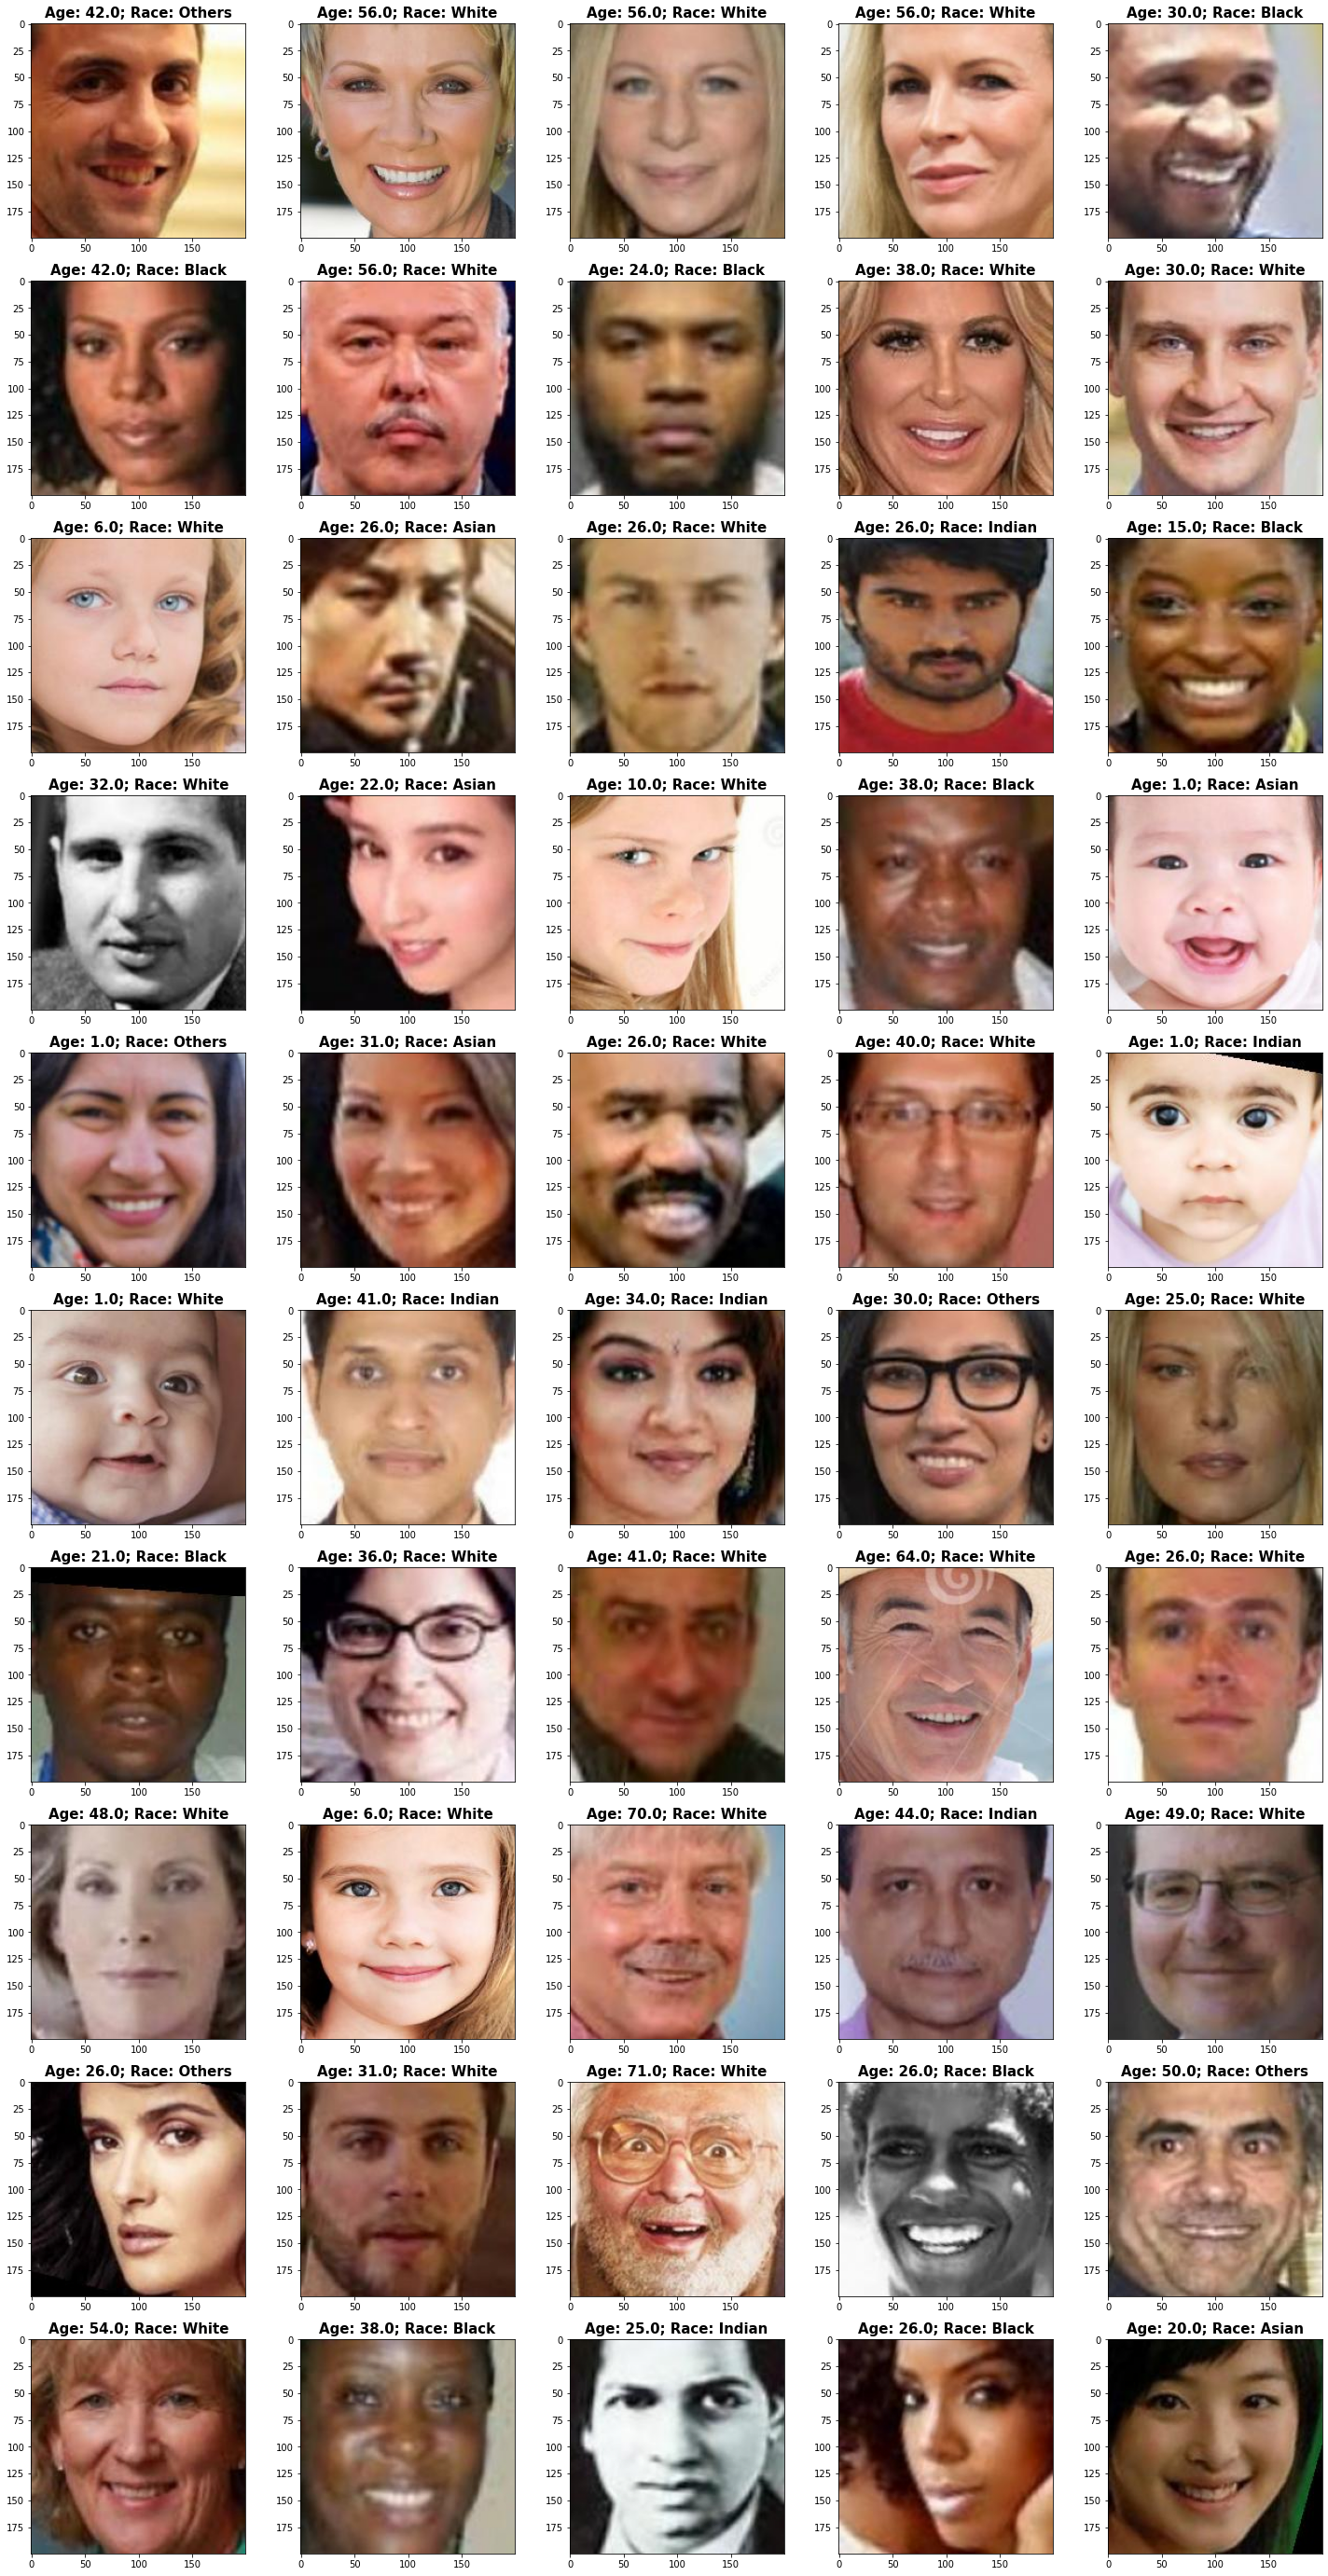

In [33]:
show_all_images_from_list(img_pic[1000:1050],img_df.iloc[1000:1050])

In [7]:
img_df = load_image_data_into_dataframe('UTKFace')

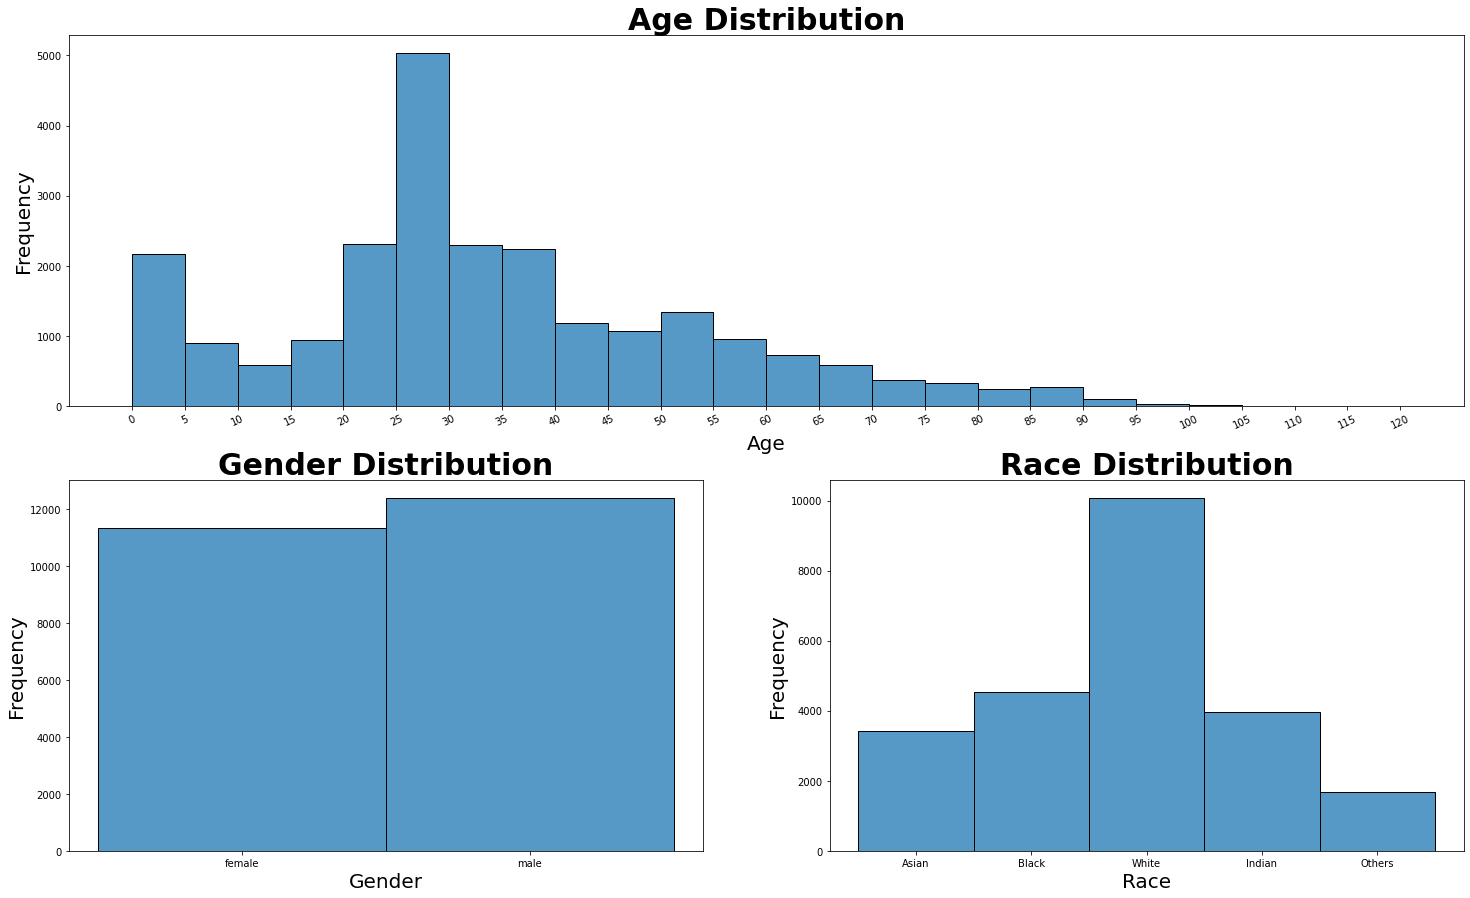

In [34]:
f = plt.figure(figsize=(25,15))
#bins_value=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120]
bins_value = list(range(0,125,5))

#Age Histogram
f.add_subplot(211)
sns.histplot(data=img_df,x = 'age', bins=bins_value)
plt.title('Age Distribution',fontweight="bold",fontsize=30)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(bins_value, rotation = 25)

# Gender Histogram
f.add_subplot(223)
sns.histplot(img_df['gender'])
plt.title('Gender Distribution',fontweight="bold",fontsize=30)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('Frequency',fontsize=20)

#Race Histogram
f.add_subplot(224)
sns.histplot(img_df['race'])
plt.title('Race Distribution',fontweight="bold",fontsize=30)
plt.xlabel('Race',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks()

plt.show()